# Prosper Loan Dataset Exploration
## by Katherine Kher

## Preliminary Wrangling

- Check Nulls and handle them
- After data cleaning, will determine the features based on their correlation

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# inspect general shape and data types
print(df.shape)
print(df.dtypes.value_counts())

(113937, 81)
float64    50
object     17
int64      11
bool        3
dtype: int64


In [5]:
# inspect data rows
print(df.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

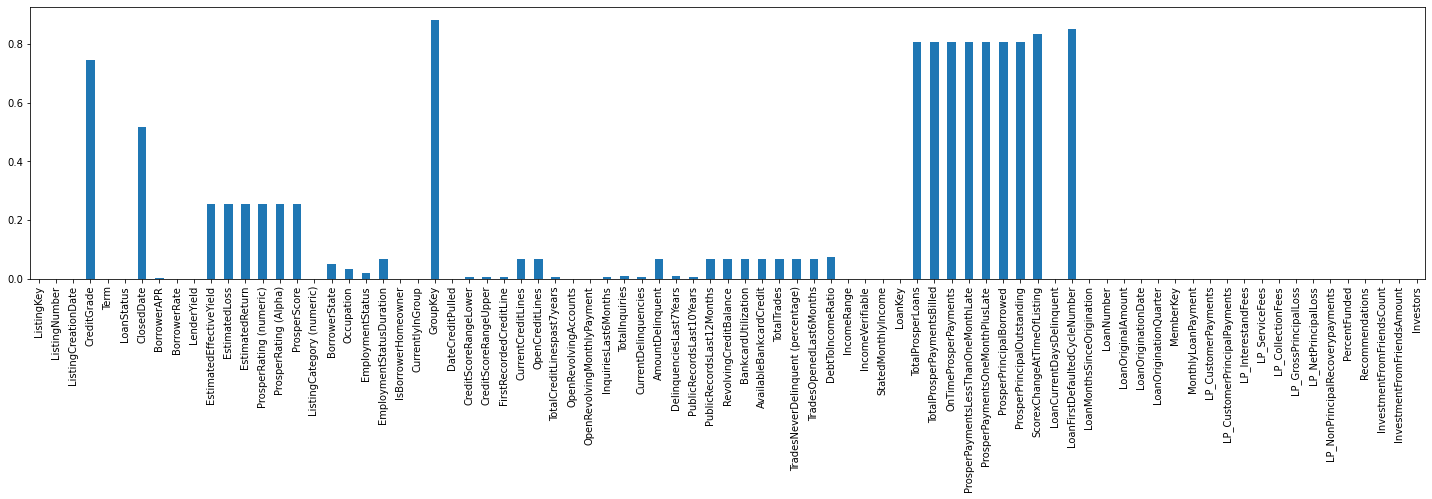

In [6]:
# plot precentage (sum/count of row) of missing values per column
(df.isna().sum()/df.shape[0]).plot.bar(figsize=(25,5));

In [7]:
# get column names with more than 50% null data
names_toDrop = (df.isnull().sum()/df.shape[0] >=0.5)
names_toDrop = names_toDrop[names_toDrop.iloc[:]==True].index.tolist()

# drop those columns
df.drop(columns=names_toDrop, inplace=True)


In [8]:
# inspect null in remaining data 
df.isna().sum()[df.isna().sum() > 0]

BorrowerAPR                              25
EstimatedEffectiveYield               29084
EstimatedLoss                         29084
EstimatedReturn                       29084
ProsperRating (numeric)               29084
ProsperRating (Alpha)                 29084
ProsperScore                          29084
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
EmploymentStatusDuration               7625
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
FirstRecordedCreditLine                 697
CurrentCreditLines                     7604
OpenCreditLines                        7604
TotalCreditLinespast7years              697
InquiriesLast6Months                    697
TotalInquiries                         1159
CurrentDelinquencies                    697
AmountDelinquent                       7622
DelinquenciesLast7Years                 990
PublicRecordsLast10Years        

In [9]:
# check remaining columns data types
print(df.dtypes.value_counts())

float64    41
object     14
int64      11
bool        3
dtype: int64


In [10]:
# explore int64 data
print(df.select_dtypes(include='int64').head())

   ListingNumber  Term  ListingCategory (numeric)  OpenRevolvingAccounts  \
0         193129    36                          0                      1   
1        1209647    36                          2                     13   
2          81716    36                          0                      0   
3         658116    36                         16                      7   
4         909464    36                          2                      6   

   LoanCurrentDaysDelinquent  LoanMonthsSinceOrigination  LoanNumber  \
0                          0                          78       19141   
1                          0                           0      134815   
2                          0                          86        6466   
3                          0                          16       77296   
4                          0                           6      102670   

   LoanOriginalAmount  Recommendations  InvestmentFromFriendsCount  Investors  
0                9425         

In [11]:
# explore float64 data
print(df.select_dtypes(include='float64').head())

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                      NaN   
1      0.12016        0.0920       0.0820                  0.07960   
2      0.28269        0.2750       0.2400                      NaN   
3      0.12528        0.0974       0.0874                  0.08490   
4      0.24614        0.2085       0.1985                  0.18316   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  \
0            NaN              NaN                      NaN           NaN   
1         0.0249          0.05470                      6.0           7.0   
2            NaN              NaN                      NaN           NaN   
3         0.0249          0.06000                      6.0           9.0   
4         0.0925          0.09066                      3.0           4.0   

   EmploymentStatusDuration  CreditScoreRangeLower  ...  LP_CustomerPayments  \
0                       2.0               

- In Order to select the features to be used in our investigation, I'll check correlation between numerical variables (int64 or float64) and select features with correlation > 0.5 for successful loans.
- In addition to exploring the answer to the following questions:
    1. What factors affect a loan’s outcome status?
    2. What affects the borrower’s APR or interest rate?
    3. Are there differences between loans depending on how large the original loan amount was?

In [12]:
# check correlation between numerical remaining columns to decide which to explore
# first get numerical columns
numeric_vars = df.select_dtypes(include=['int64','float64']).columns

# calculate correlation between numerical variables for successful loans 
# (i.e loan status is either; completed, FinalPaymentInProgress)
corr_mat = df.query('LoanStatus == "FinalPaymentInProgress" or LoanStatus == "Completed"').corr()

# get variables with correlation > 0.5
indices = np.where(corr_mat > 0.5)
indices = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices[:10]

[('ListingNumber', 'LoanNumber'),
 ('BorrowerAPR', 'BorrowerRate'),
 ('BorrowerAPR', 'LenderYield'),
 ('BorrowerAPR', 'EstimatedEffectiveYield'),
 ('BorrowerAPR', 'EstimatedLoss'),
 ('BorrowerAPR', 'EstimatedReturn'),
 ('BorrowerRate', 'LenderYield'),
 ('BorrowerRate', 'EstimatedEffectiveYield'),
 ('BorrowerRate', 'EstimatedLoss'),
 ('BorrowerRate', 'EstimatedReturn')]

### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

Detailed description of this dataset can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### What is/are the main feature(s) of interest in your dataset?

There are lots of features that can be considered to be main, as per correlation result above, however those features can be categorized into 2 main buckets; financial capabilities & bank-related history

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will investigate the below features, based on the correlation matrix above and the below suggested Qs:
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

Features to investigate:
1. **Bank-related** Bucket:
    - BorrowerAPR
    - ProsperScore
    - OpenCreditLines
    - EstimatedLoss / EstimatedReturn
    - LoanOriginalAmount
    - Term
2. **Financial** Bucket:
    - EmploymentStatus
    - EmploymentStatusDuration
    - ListingCategory
    - IncomeRange
    - IncomeVerifiable

## Univariate Exploration

We shall start by exploring  each variable (mentioned on the previous slide) individually, first by plotting qualitative features alone using countplot

In [13]:
# change listingCategory from numeric to qualitative values

df['ListingCategory'] = df.apply(
    lambda x: 'Not Avail' if x['ListingCategory (numeric)'] == 0 
    else 'Debt Consolidation' if x['ListingCategory (numeric)'] == 1
    else 'Home Improvement' if x['ListingCategory (numeric)'] == 2
    else 'Business' if x['ListingCategory (numeric)'] == 3
    else 'Personal Loan' if x['ListingCategory (numeric)'] == 4
    else 'Student Use' if x['ListingCategory (numeric)'] == 5
    else 'Auto' if x['ListingCategory (numeric)'] == 6
    else 'Other' if x['ListingCategory (numeric)'] == 7
    else 'Baby&Adoption' if x['ListingCategory (numeric)'] == 8
    else 'Boat' if x['ListingCategory (numeric)'] == 9
    else 'Cosmetic Procedure' if x['ListingCategory (numeric)'] == 10
    else 'Engagement Ring' if x['ListingCategory (numeric)'] == 11
    else 'Green Loans' if x['ListingCategory (numeric)'] == 12
    else 'Household Expenses' if x['ListingCategory (numeric)'] == 13
    else 'Large Purchases' if x['ListingCategory (numeric)'] == 14
    else 'Medical/Dental' if x['ListingCategory (numeric)'] == 15
    else 'Motorcycle' if x['ListingCategory (numeric)'] == 16
    else 'RV' if x['ListingCategory (numeric)'] == 17
    else 'Taxes' if x['ListingCategory (numeric)'] == 18
    else 'Vacation' if x['ListingCategory (numeric)'] == 19
    else 'Wedding Loans' if x['ListingCategory (numeric)'] == 20
    else x['ListingCategory (numeric)'], axis = 1)

In [14]:
# explore types of features selected
variables = ['LoanStatus','BorrowerAPR','ProsperScore','OpenCreditLines','EstimatedLoss','EstimatedReturn','LoanOriginalAmount','Term','EmploymentStatus', 'EmploymentStatusDuration','ListingCategory','IncomeRange','IncomeVerifiable']
df[variables].dtypes

LoanStatus                   object
BorrowerAPR                 float64
ProsperScore                float64
OpenCreditLines             float64
EstimatedLoss               float64
EstimatedReturn             float64
LoanOriginalAmount            int64
Term                          int64
EmploymentStatus             object
EmploymentStatusDuration    float64
ListingCategory              object
IncomeRange                  object
IncomeVerifiable               bool
dtype: object

In [15]:
# change bool variable to str
df['IncomeVerifiable'] = df['IncomeVerifiable'].astype('str')

- By plotting count of LoanStatus, we see most of our dataset falls in the bucket of (Completed, Current, Chargedoff and deafulted)
- By plotting count of EmploymentStatus, we see most of our dataset falls in the bucket of (Employed, Full-time, self-employed and not available!)

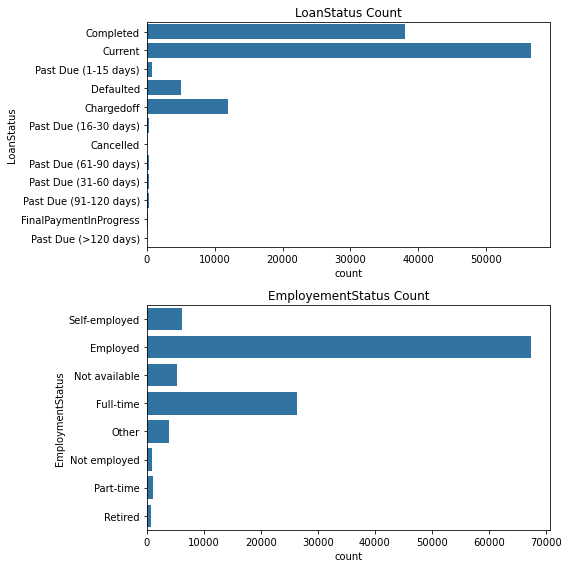

In [16]:
# Explore each variable individually

# first plot qualitative features alone using countplot
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]

sb.countplot(data = df, y = 'LoanStatus', color = default_color, ax = ax[0]).set_title('LoanStatus Count');
sb.countplot(data = df, y = 'EmploymentStatus', color = default_color, ax = ax[1]).set_title(label='EmployementStatus Count');
plt.tight_layout()

- By plotting count of ListingCategory, we see most of our dataset falls in the bucket of (Debt Consolidation, Home Improvement, Not Avail, Business and Other)
- By plotting count of IncomeVerifiable, we see most of our Income data is verifiable

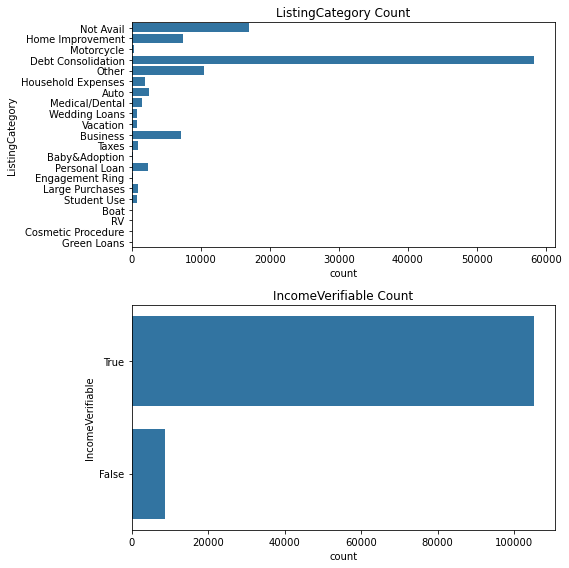

In [17]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.countplot(data = df, y = 'ListingCategory', color = default_color, ax = ax[0]).set_title('ListingCategory Count');
sb.countplot(data = df, y = 'IncomeVerifiable', color = default_color, ax = ax[1]).set_title('IncomeVerifiable Count');
plt.tight_layout()

- By plotting count of IncomeRange, we see most of our Income Range varies from 0 dollars till 100,000+, however almost 40% of our data is within 25K-75K dollars range

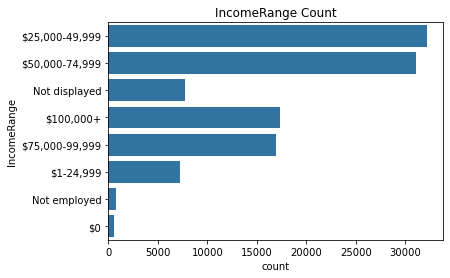

In [18]:
sb.countplot(data = df, y = 'IncomeRange', color = default_color).set_title('IncomeRange Count');

## Summary

By Exploring our categorical variables selected above, we notice the following:
- **LoanStatus** mainly is either: Completed, Current, Chargedoff, Defaulted
- Almost 90% of our data is for **IncomeVerifiable** customers
- Most of the loans are for ppl whose **IncomeRange** is between 25K-75K dollars
- Most of the loans are given to ppl with **EmploymentStatus** of employed or full-time
- And almost 70% of loans are **ListingCategory** of Debt conslidation 

In [19]:
# second plot hist of quantative variables

# define qual features
quan_variables = ['BorrowerAPR','ProsperScore','OpenCreditLines','EstimatedLoss','EstimatedReturn','LoanOriginalAmount','Term','EmploymentStatusDuration']

# explore their ranges
df[quan_variables].describe()


,BorrowerAPR,ProsperScore,OpenCreditLines,EstimatedLoss,EstimatedReturn,LoanOriginalAmount,Term,EmploymentStatusDuration
count,113912.000000,84853.000000,106333.000000,84853.000000,84853.000000,113937.00000,113937.000000,106312.000000
mean,0.218828,5.950067,9.260164,0.080306,0.096068,8337.01385,40.830248,96.071582
std,0.080364,2.376501,5.022644,0.046764,0.030403,6245.80058,10.436212,94.480605
min,0.006530,1.000000,0.000000,0.004900,-0.182700,1000.00000,12.000000,0.000000
25%,0.156290,4.000000,6.000000,0.042400,0.074080,4000.00000,36.000000,26.000000
50%,0.209760,6.000000,9.000000,0.072400,0.091700,6500.00000,36.000000,67.000000
75%,0.283810,8.000000,12.000000,0.112000,0.116600,12000.00000,36.000000,137.000000
max,0.512290,11.000000,54.000000,0.366000,0.283700,35000.00000,60.000000,755.000000


## Univariate Exploration - Cont'd

We shall continue by exploring  each variable individually, but now we will plot numerical features

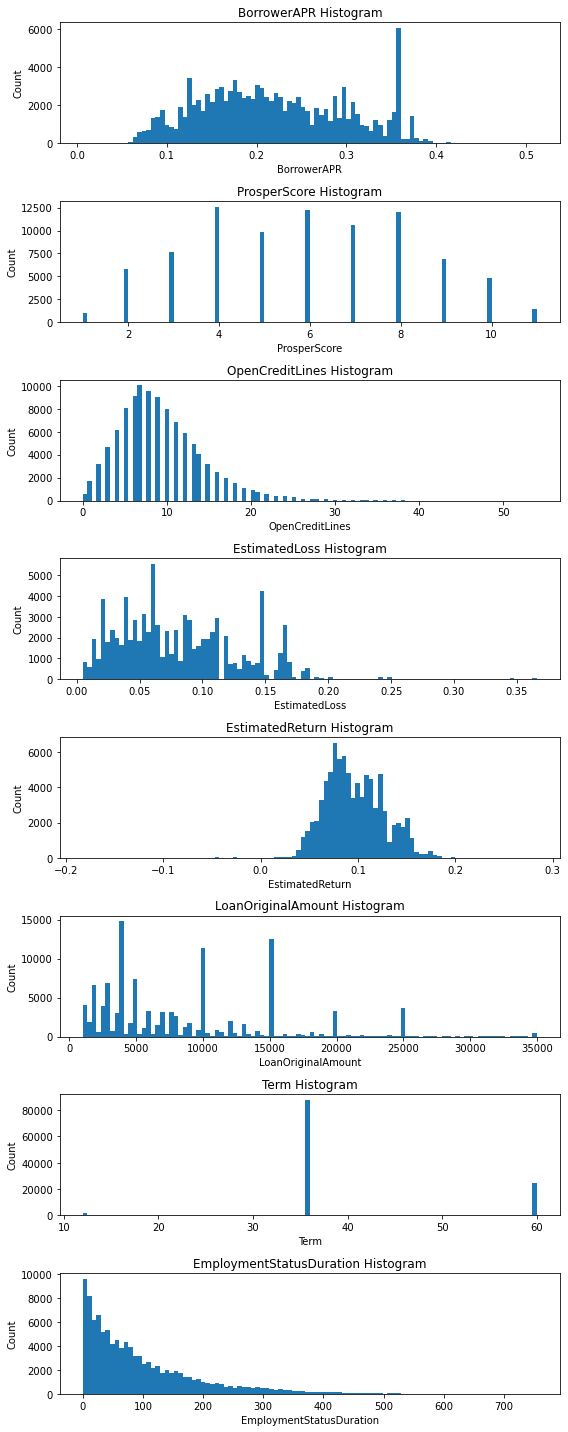

In [20]:
# plot histograms of quan_variables
fig, ax = plt.subplots(nrows=8, figsize = [8,20])

for i in range(len(quan_variables)):
    var = quan_variables[i]
    binsize=(df[var].max() - df[var].min())/100
    bins = np.arange(df[var].min(), df[var].max()+binsize, binsize)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title('{} Histogram'.format(var))

plt.tight_layout()    
plt.show()

## Summary

By Exploring our numerical variables selected above, we notice the following:
- Further invesigation needs to be done on **BorrowerAPR**
- Transformation of **EmploymentStatusDuration** is needed to understand distribution, log-scale would be helpful
- Taking a deeper look into **LoanOriginalAmount** is advised
- Plotting **EstimatedLoss** & **EstimatedReturn** without the outliers and under the same range is needed

- By taking a deeper look into LoanOriginalAmount, we find there are peaks at 4K, 10K, 15K & 20K dollars

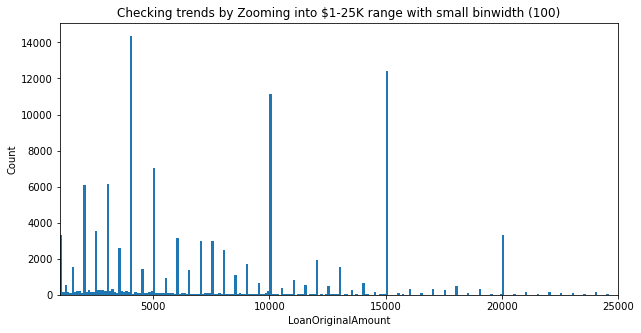

In [21]:
# investigating further on an even smaller bin size
bins = np.arange(1000, 25000, 100)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Checking trends by Zooming into $1-25K range with small binwidth (100)')
plt.xlim([1000,25000])
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
plt.show()

- By plotting both EstimatedReturn, EstimatedLoss withing the same x-lim (0-0.3), we see that EstimatedReturn is almost unimodal around ~0.075, and EstimatedLoss is almost bi-modal around ~0.05 & 0.15

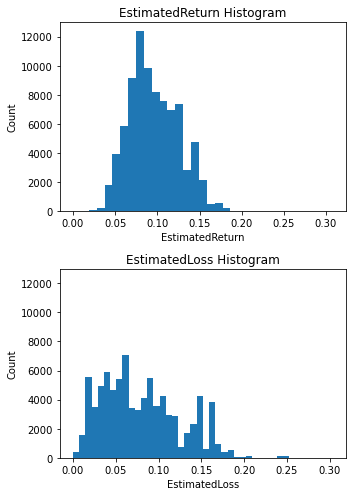

In [22]:
# re-plot the distribution of Loss and Return
fig, ax = plt.subplots(nrows=2, figsize = [5,7], sharey=True)

LR_variables = ['EstimatedReturn', 'EstimatedLoss']
for i in range(2):
    var = LR_variables[i]
    binwidth = (df[var].max() - df[var].min())/50
    bins = np.arange(0, 0.3+binwidth, binwidth)
    ax[i].hist(data = df, x = var, bins = bins, range=(0, 0.3))
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('Count')
    ax[i].set_title('{} Histogram'.format(var))

plt.tight_layout()        
plt.show()

- EmploymentStatusDuration showed decaying exponential pattern when plotted as is, hence I've transofrmed it via log-scale to get a better look at its distribution, after transformation we can see it is almost normal around peak of 100.

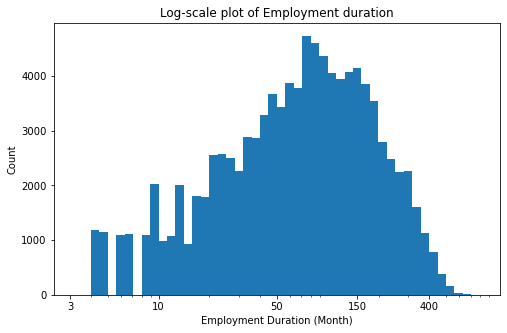

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0.5, np.log10(df['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks([3,10,50,150, 400], [3,10,50,150,400])
plt.xlabel('Employment Duration (Month)')
plt.ylabel('Count')
plt.title('Log-scale plot of Employment duration')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. **EmploymentStatusDuration** distribution has a long-tailed distribution, with a lot of entries with low duration. When plotted on a log-scale, the duration distribution looks almost normally distributed, with one peak around 100 (Months). Interestingly, it rapidly drops after 150.
2. **BorrowerAPR** is almost a normal around 0.2, however there is a huge spike at ~0.35 which needs to be furtherly investigated
3. **EstimatedReturn** & **EstimatedLoss** fall under the same range (with few outliers) between 0 and 0.3, when both are drawn together, limiting their range to the observed one, we notice that *EstimatedReturn* is ***unimodal*** around 0.75 and *EstimatedLoss* is ***bi-modal*** around 0.05 & 0.15
4. By zooming into **LoanOriginalAmount**, we find it follows a decaying trend, starting from certain peak points till the next, noticeable peaks are at: 4000, 10000, 15000 & 20000.
5. **Term** has 3 distinct values only


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Two cleaning actions at the very beginning were performed:
1. Dropping all columns with > 50% of their values = na
2. ListingCategory column was added to be used of its numerical value column

## Bivariate Exploration

In this section, investigate relationships between pairs of variables.

- First approach, explore LoanStatus Vs. remaining features.
    - In this section we focus on our top 5 LoanStatuses; Completed, Current, Defaulted, Chargedoff , Past Due (1-15 days)
    - We scatter plot to see how other **numerical** variables are distributed across those Statuses

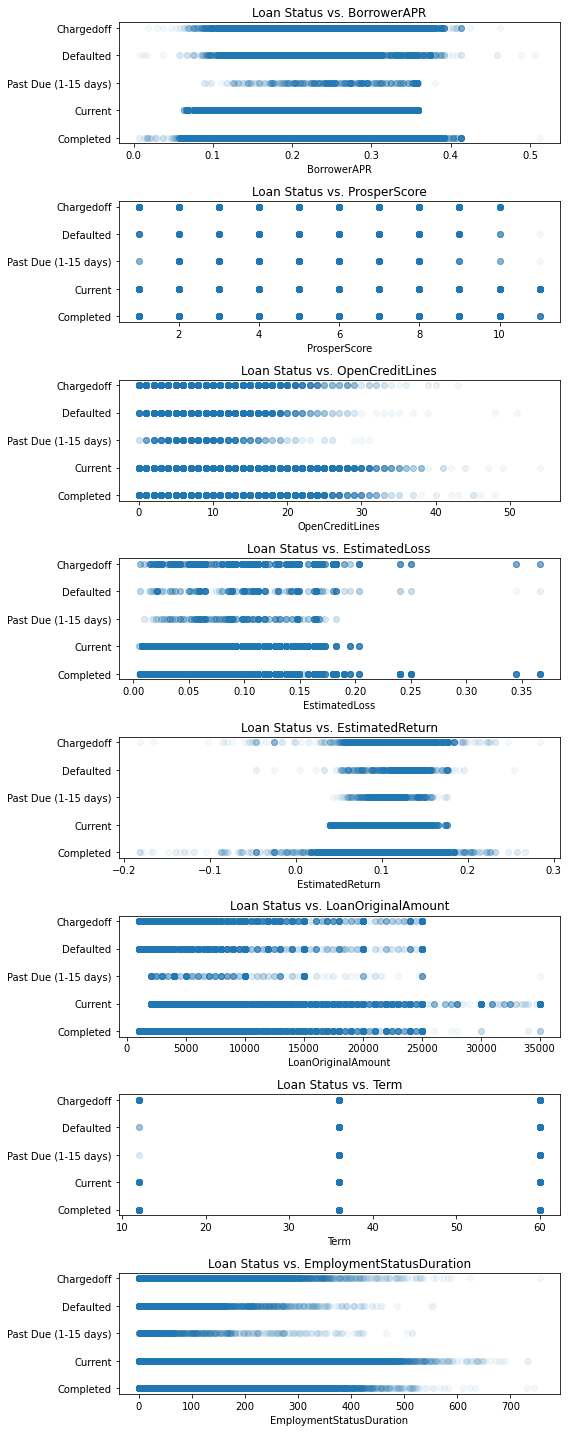

In [24]:
# plotting relationship between selected qualitative features and loanStatus .. focusing only on the top 5 Statuses

loanStatus_df = df.query('LoanStatus in ("Completed","Current","Defaulted","Chargedoff","Past Due (1-15 days)")')

fig, ax = plt.subplots(nrows=8, figsize = [8, 20])

for i in range(len(quan_variables)):
    var = quan_variables[i]
    ax[i].scatter(loanStatus_df[var],loanStatus_df['LoanStatus'], alpha=0.05)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title('Loan Status vs. {}'.format(var))

plt.tight_layout()    
plt.show()

## Bivariate Exploration
In this section, investigate relationships between pairs of variables.

- First approach, explore LoanStatus Vs. remaining features Cont'd
    - In this section we focus on our top 5 LoanStatuses; Completed, Current, Defaulted, Chargedoff , Past Due (1-15 days)
    - We scatter plot to see how other **categorical** variables are distributed across those Statuses

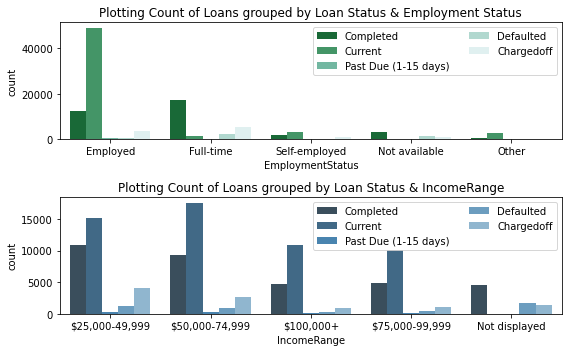

In [25]:
# plot Loan Status count per qualitative features
plt.figure(figsize = [8, 5])

# chose to plot only top 5 of df.LoanStatus.value_counts() .. as the remaining are too low compared to the rest

# subplot 1: LoanStatus vs EmploymentStatus
ax = plt.subplot(2, 1, 1)
sb.countplot(data = loanStatus_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'BuGn_r', order=df.EmploymentStatus.value_counts().iloc[:5].index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
ax.set_title('Plotting Count of Loans grouped by Loan Status & Employment Status')

# subplot 2: LoanStatus vs. IncomeRange
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loanStatus_df, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues_d', order=df.IncomeRange.value_counts().iloc[:5].index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
ax.set_title('Plotting Count of Loans grouped by Loan Status & IncomeRange')

plt.tight_layout()
plt.show()

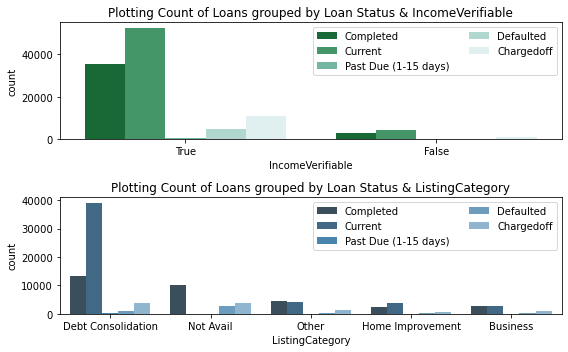

In [26]:
# plot Loan Status count per qualitative features
plt.figure(figsize = [8, 5])

# chose to plot only top 5 of df.LoanStatus.value_counts() .. as the remaining are too low compared to the rest

# subplot 3: LoanStatus vs. IncomeVerifiable
ax = plt.subplot(2, 1, 1)
sb.countplot(data = loanStatus_df, x = 'IncomeVerifiable', hue = 'LoanStatus', palette = 'BuGn_r', order=df.IncomeVerifiable.value_counts().iloc[:5].index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
ax.set_title('Plotting Count of Loans grouped by Loan Status & IncomeVerifiable')

# subplot 3: LoanStatus vs. ListingCategory
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loanStatus_df, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues_d', order=df.ListingCategory.value_counts().iloc[:5].index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
ax.set_title('Plotting Count of Loans grouped by Loan Status & ListingCategory')

plt.tight_layout()
plt.show()

## Bivariate Exploration - Cont'd
In this section, investigate relationships between pairs of variables.

- Second approach, explore BorrowerAPR Vs. remaining features
    - First plot against categorical vairables (EmploymentStatus/IncomeVerifiable, IncomeRange/IncomeVerifiable, ListingCategory)

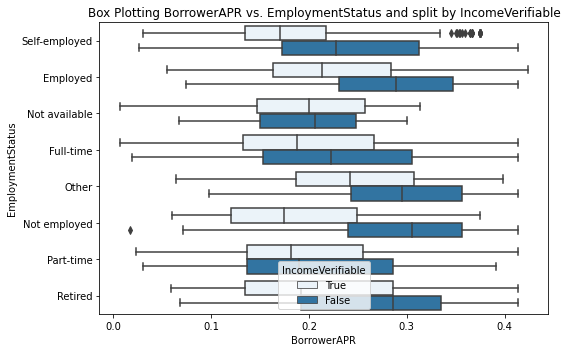

In [27]:
# Explore relationship between rate (Borrower APR) vs. EmploymentStatus, ListingCategory & Term

plt.figure(figsize = [8, 5])

# subplot 1: BorrowerAPR vs EmploymentStatus .. hue on if income is verifiable
sb.boxplot(data = df, y = 'EmploymentStatus', x = 'BorrowerAPR', hue='IncomeVerifiable', color=sb.color_palette()[0]);
plt.title('Box Plotting BorrowerAPR vs. EmploymentStatus and split by IncomeVerifiable')

plt.tight_layout()
plt.show();

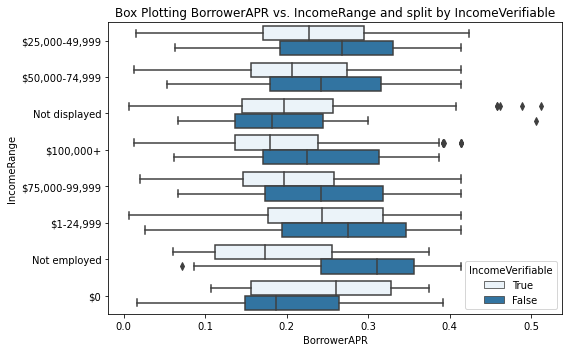

In [28]:
plt.figure(figsize = [8, 5])
# subplot 2: BorrowerAPR vs IncomeRange .. hue on if income is verifiable
sb.boxplot(data = df, y = 'IncomeRange', x = 'BorrowerAPR', hue='IncomeVerifiable', color=sb.color_palette()[0]);
plt.title('Box Plotting BorrowerAPR vs. IncomeRange and split by IncomeVerifiable')

plt.tight_layout()
plt.show();

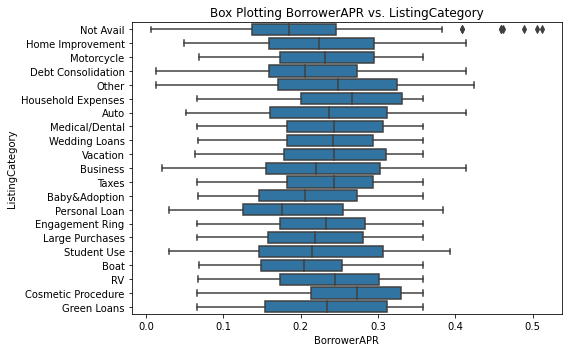

In [29]:
plt.figure(figsize = [8, 5])
# subplot 3: BorrowerAPR vs. ListingCategory
sb.boxplot(data = df, y = 'ListingCategory', x = 'BorrowerAPR', color=sb.color_palette()[0]);
plt.title('Box Plotting BorrowerAPR vs. ListingCategory')

plt.tight_layout()
plt.show();

- Next is plotting BorrowerAPR against Term

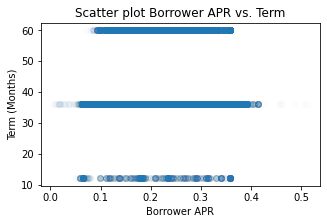

In [30]:
# Explore relationship between rate (Borrower APR) vs. Term
plt.figure(figsize = [5, 3])

plt.scatter(data = df, x = 'BorrowerAPR', y = 'Term', alpha = 0.01)
plt.xlabel('Borrower APR')
plt.ylabel('Term (Months)')
plt.title('Scatter plot Borrower APR vs. Term')

plt.show()

Can't really get much information from above scatter plot, except that APR range for the 30+ Months loan term is the widest, hence will plot distribution of APR per each term

In [31]:
# get unique values of Term
df['Term'].unique()

array([36, 60, 12], dtype=int64)

Text(0.5, 1.0, 'Borrower APR density distribution per 3 Unique values of Term')

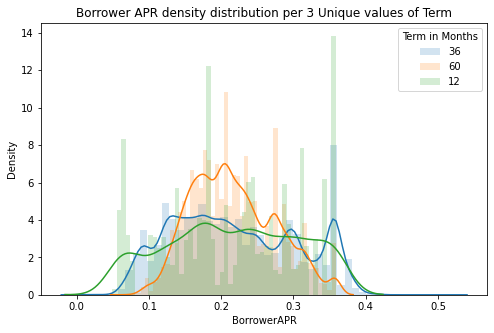

In [32]:
# Explore relationship between rate (Borrower APR) vs. Term
plt.figure(figsize = [8, 5])

sb.distplot( df.loc[df['Term'] == df['Term'].unique()[0]]['BorrowerAPR'] , kde=True, bins=50,
            label = df['Term'].unique()[0],
             hist_kws={"alpha":0.2});

sb.distplot( df.loc[df['Term'] == df['Term'].unique()[1]]['BorrowerAPR'] , kde=True, bins=50,
            label = df['Term'].unique()[1],
             hist_kws={"alpha":0.2});

sb.distplot( df.loc[df['Term'] == df['Term'].unique()[2]]['BorrowerAPR'] , kde=True, bins=50,
            label = df['Term'].unique()[2],
             hist_kws={"alpha":0.2});

plt.legend(title='Term in Months')
plt.ylabel('Density')
plt.title('Borrower APR density distribution per 3 Unique values of Term')

- Next is plotting BorrowerAPR against LoanOriginalAmount

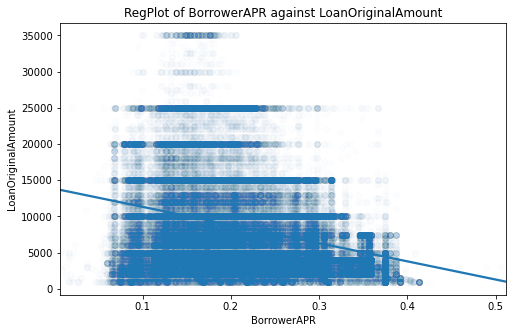

In [33]:
# Explore relationship between rate (Borrower APR) vs. LoanOriginalAmount
plt.figure(figsize = [8, 5])

sb.regplot(data = df, x = 'BorrowerAPR', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.01})
plt.title('RegPlot of BorrowerAPR against LoanOriginalAmount')
plt.show()

- Next is plotting BorrowerAPR against EstimatedLoss

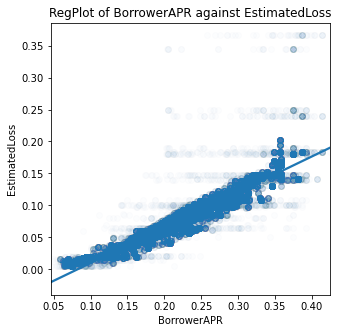

In [34]:
# Explore relationship between rate (Borrower APR) vs. EstimatedLoss
plt.figure(figsize = [5, 5])

sb.regplot(data = df, x = 'BorrowerAPR', y = 'EstimatedLoss', scatter_kws={'alpha':0.01});
plt.title('RegPlot of BorrowerAPR against EstimatedLoss')
plt.show()

- Next is plotting BorrowerAPR against EstimatedReturn

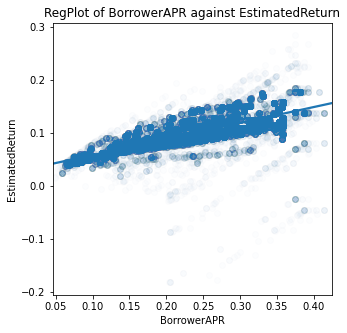

In [35]:
# Explore relationship between rate (Borrower APR) vs. EstimatedReturn
plt.figure(figsize = [5, 5])

sb.regplot(data = df, x = 'BorrowerAPR', y = 'EstimatedReturn', scatter_kws={'alpha':0.01});
plt.title('RegPlot of BorrowerAPR against EstimatedReturn')

plt.show()

- Next is plotting BorrowerAPR against OpenCreditLines

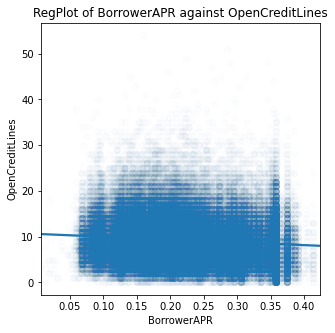

In [36]:
# Explore relationship between rate (Borrower APR) vs. OpenCreditLines
plt.figure(figsize = [5, 5])

sb.regplot(data = df, x = 'BorrowerAPR', y = 'OpenCreditLines', scatter_kws={'alpha':0.01});
plt.title('RegPlot of BorrowerAPR against OpenCreditLines')

plt.show()

- Next is plotting BorrowerAPR against ProsperScore

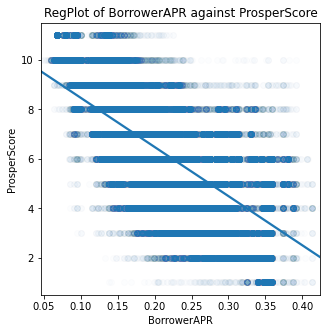

In [37]:
# Explore relationship between rate (Borrower APR) vs. ProsperScore
plt.figure(figsize = [5, 5])

sb.regplot(data = df, x = 'BorrowerAPR', y = 'ProsperScore', scatter_kws={'alpha':0.01});
plt.title('RegPlot of BorrowerAPR against ProsperScore')

plt.show()

- We close bivariate analysis by:
    1. Heatmap plot between our numerical features

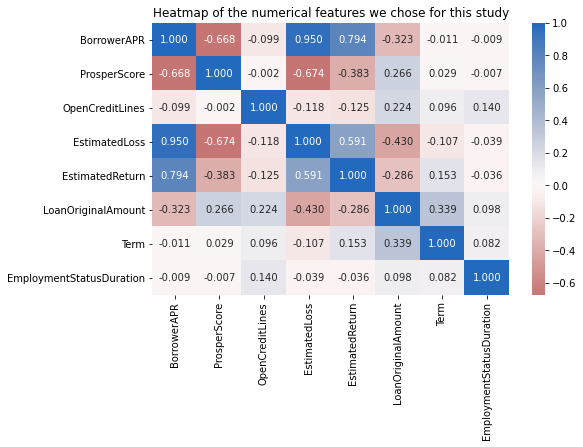

In [38]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[quan_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap of the numerical features we chose for this study')

plt.show()

- We close bivariate analysis by:
    2. PairGrid plot between our numerical features

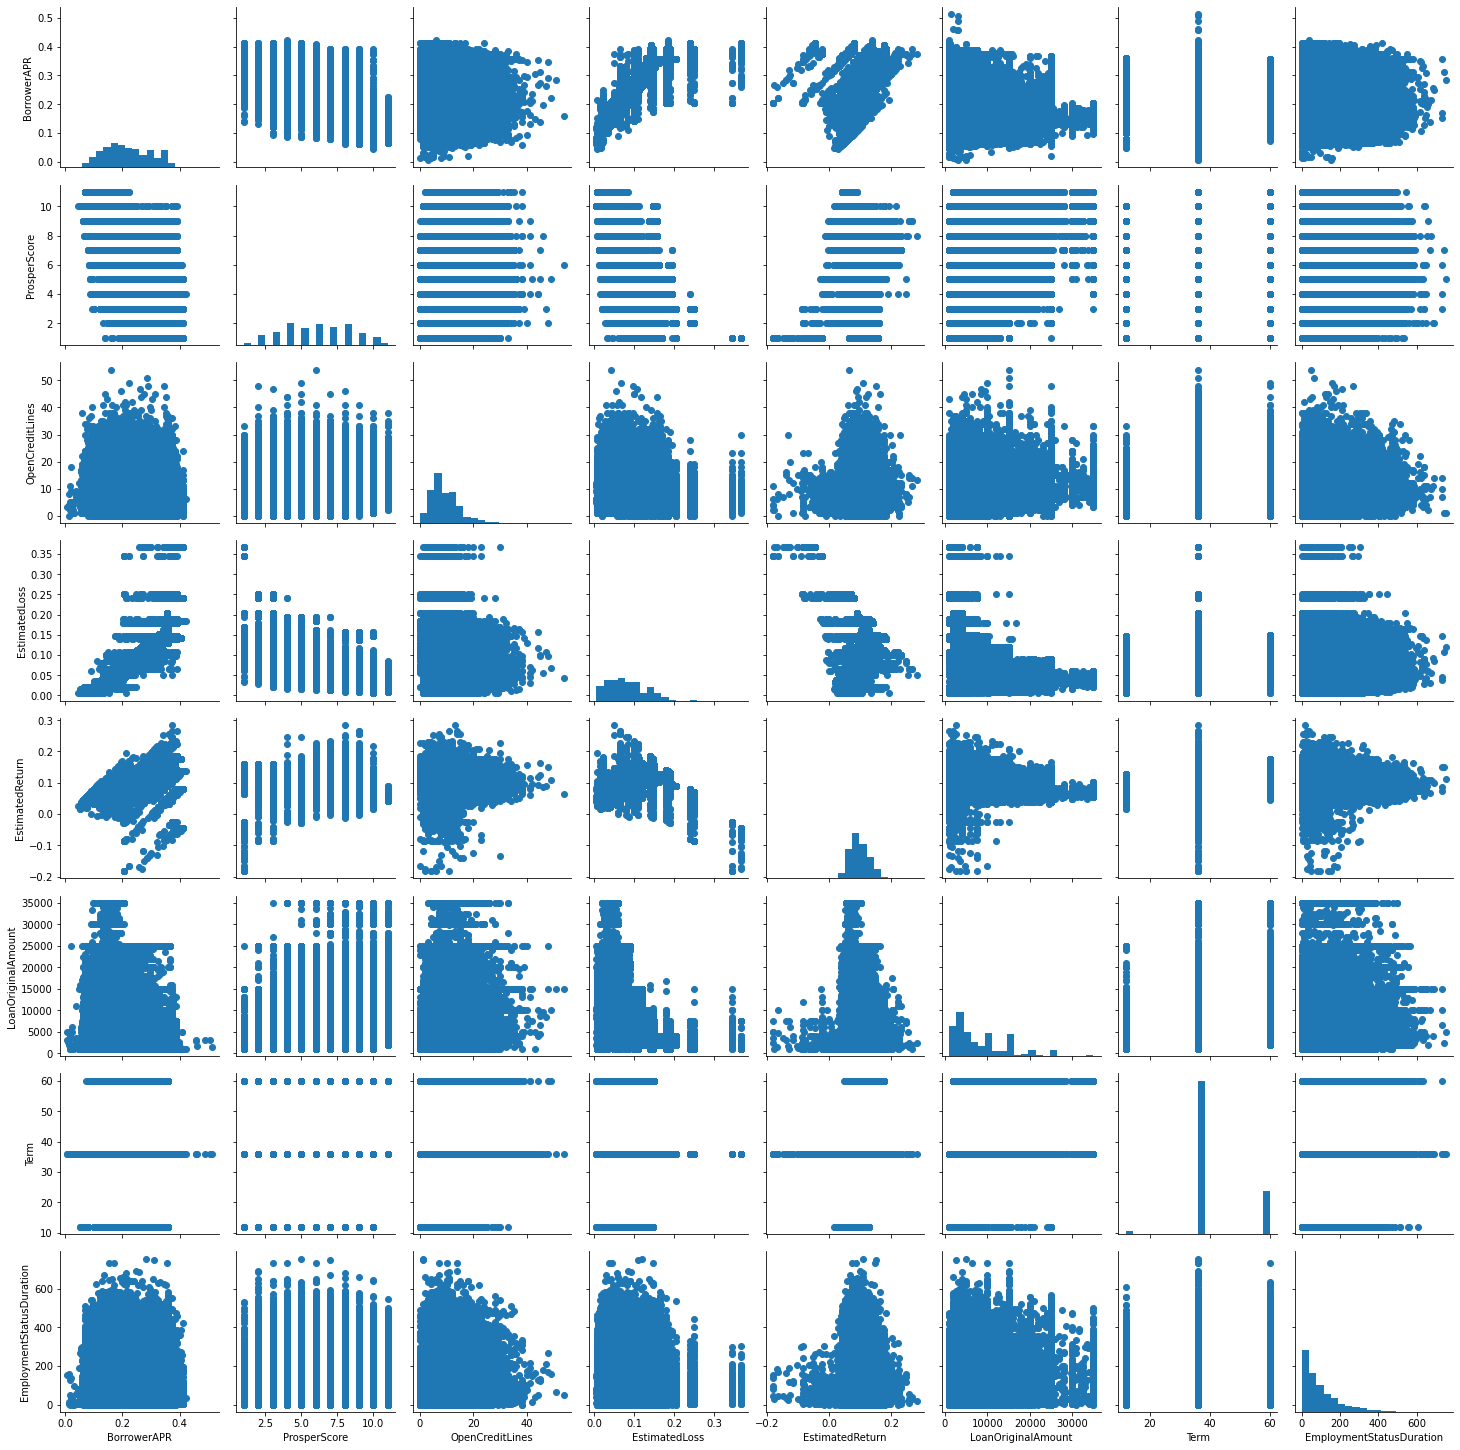

In [39]:
# plotting relationship between selected numerical features
g = sb.PairGrid(data = df, vars = quan_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Two main approaches were followed:
1. **LoanStatus** vs. all other variables
2. **BorrowerAPR** vs. all other variables

**LoanStatus** exploration and analysis:
- By focusing on the top 5 Statuses we find most of the bivariate analysis agree with the univariate analysis, in terms of where we find most of our data points.
- However there were couple of interesting findings:
    1. Current Loans have more data featured with High employment duration, High Loan amounts and High # of Open Credits
    2. Estimated Loss for the loans doesn't differ significantly by Status
    3. Estimated Return's range for chargedoff loans is large

**BorrowerAPR** exploration and analysis:
- APR is indirectly propotional with ProsperScore, in an obvious way.
- APR is very slightly increases as EstimatedLoss increase, while on the other hand it positively changes as EstimatedReturn increase almost by a factor of 1/2.
- APR increases as the amount of loan decreases, hence negatively correlated.
- Surprisingly APR doesn't vary greatly with OpenCreditLines as I expected to find.
- And finally APR distribution becomes less variant and more centered around 0.2 as the Term increases to 36
- In general APR mean is greater if the Income is unverfieable regardless of the IncomeRange or Employment Status, it's range is also larger.
- APR range is larger for certain Listing Categories; such as Personal Loans, Business, Students and Debt settlement

## Multivariate Exploration

In this section, investigate relationships between 3 of the variables.
- We start with investigating the relationship between BorrowerAPR & EstimatedLoss across IncomeVerifiable & EmploymentStatus

In [40]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
    

C:\Users\kathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\kathe\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


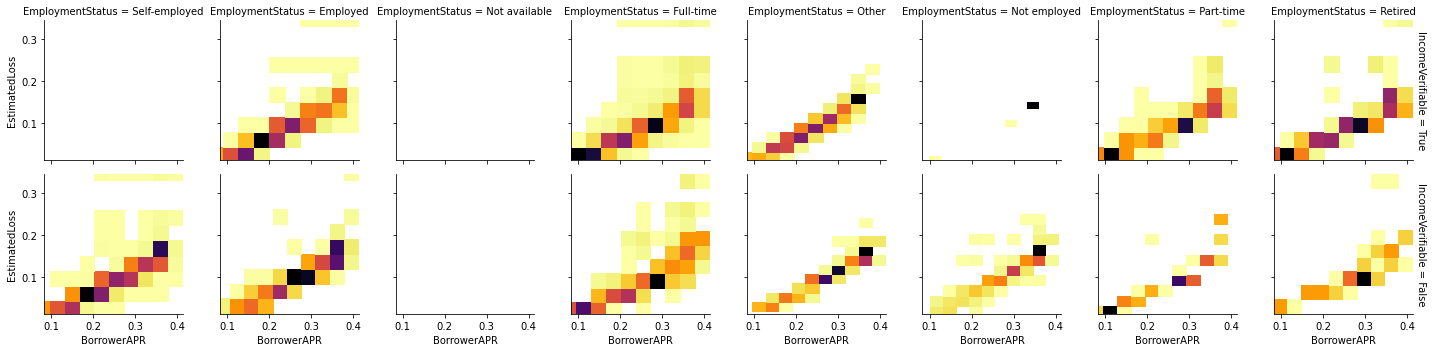

In [41]:
# Explore APR, EstimatedLoss .. FacetGrid on EmploymentStatus & IncomeVerifiable

g = sb.FacetGrid(data = df, row = 'IncomeVerifiable', col = 'EmploymentStatus', size = 2.5, margin_titles = True)
g.map(hist2dgrid, 'BorrowerAPR', 'EstimatedLoss', color = 'inferno_r')

plt.tight_layout()
plt.show()

## Multivariate Exploration - Cont'd

In this section, investigate relationships between 3 of the variables.
- Next plot the relationship between BorrowerAPR & EstimatedReturn across IncomeVerifiable & EmploymentStatus

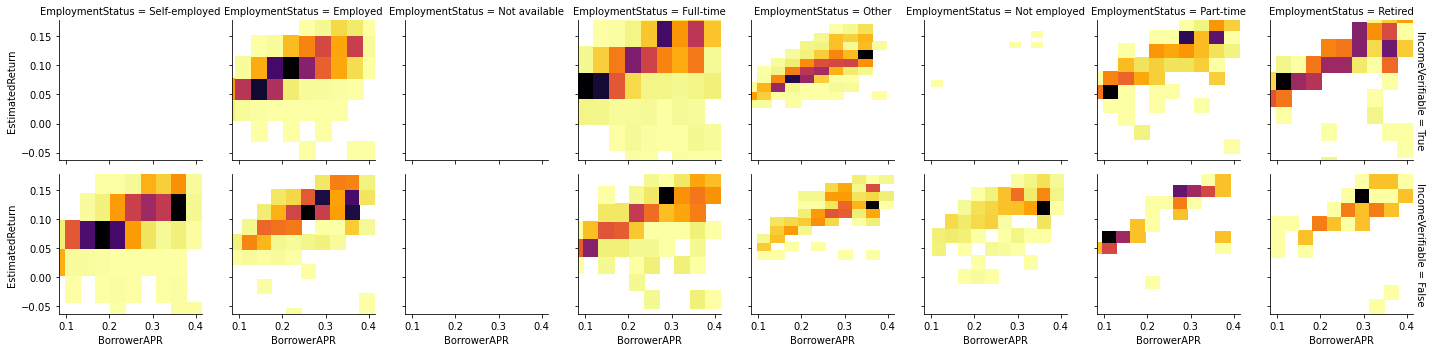

In [42]:
# Explore APR, EstimatedReturn .. FacetGrid on EmploymentStatus & IncomeVerifiable

g = sb.FacetGrid(data = df, row = 'IncomeVerifiable', col = 'EmploymentStatus', size = 2.5, margin_titles = True)
g.map(hist2dgrid, 'BorrowerAPR', 'EstimatedReturn', color = 'inferno_r')

plt.show()

## Multivariate Exploration - Cont'd

In this section, investigate relationships between 3 of the variables.
- Next plot the relationship between ListingCategory & LoanOriginalAmount across LoanStatus

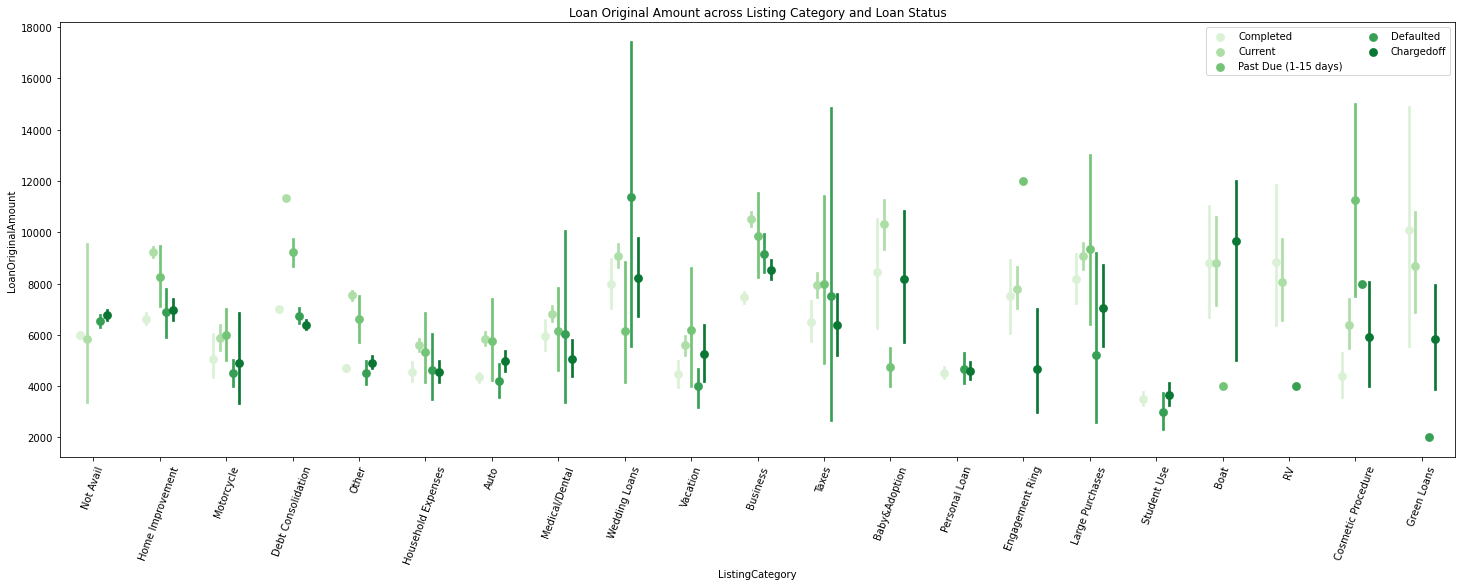

In [52]:
# Explore LoanOriginalAmount, LoanStatus & ListingCategory

fig = plt.figure(figsize = [25,8])
ax = sb.pointplot(data = loanStatus_df, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Listing Category and Loan Status')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=70)

plt.show();

## Multivariate Exploration - Cont'd

In this section, investigate relationships between 3 of the variables.
- Next plot the relationship between IncomeRange & LoanOriginalAmount across EmploymentStatus

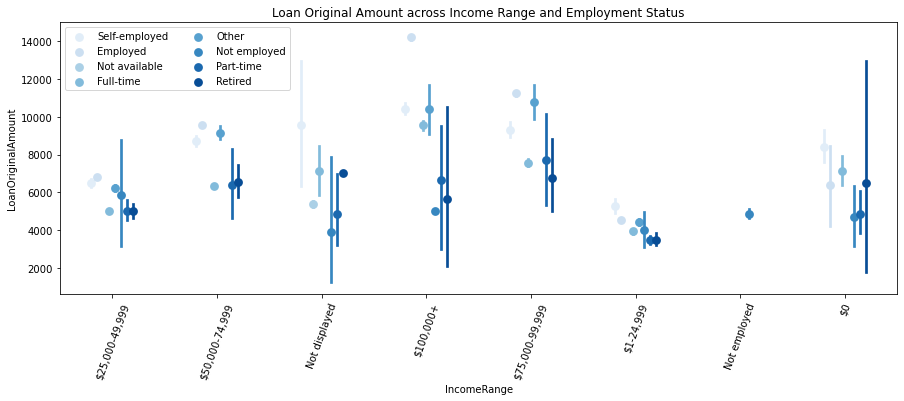

In [44]:
# Explore LoanOriginalAmount, IncomeRange & EmploymentStatus

fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = loanStatus_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount across Income Range and Employment Status')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=70)

plt.show();

## Multivariate Exploration - Cont'd

In this section, investigate relationships between 3 of the variables.
- Next plot the relationship between ListingCategory & BorrowerAPR across EmploymentStatus

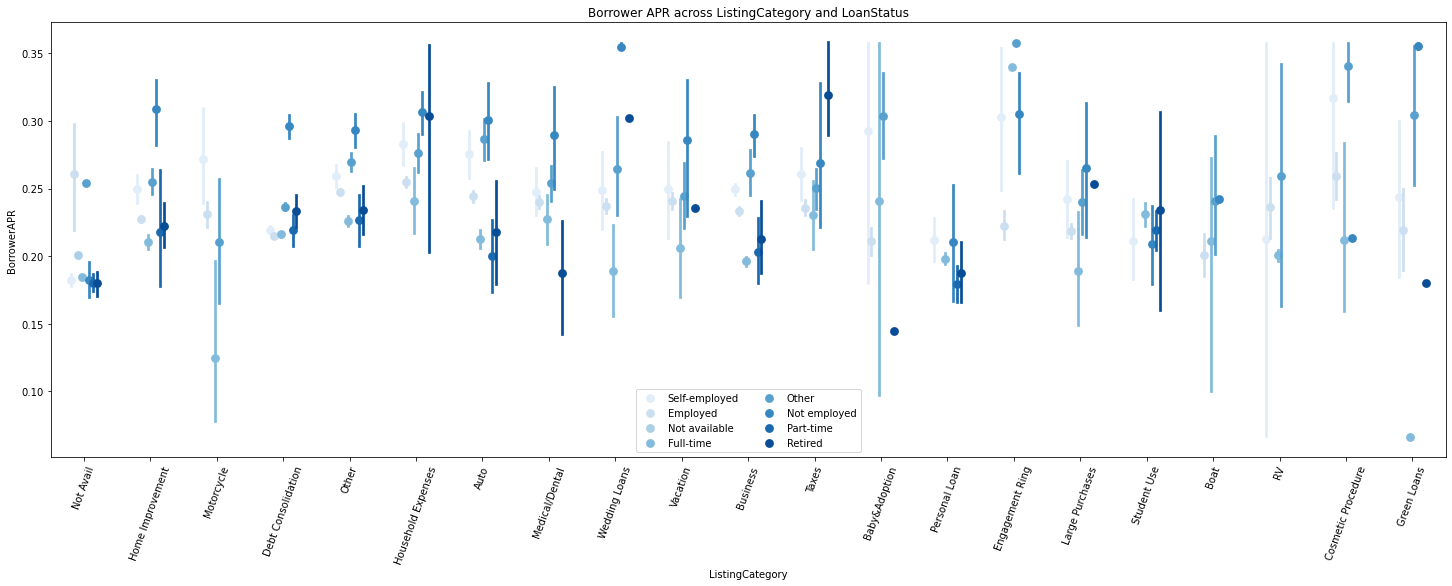

In [45]:
# Explore APR, EmploymentStatus & ListingCategory

fig = plt.figure(figsize = [25,8])
ax = sb.pointplot(data = loanStatus_df, x = 'ListingCategory', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across ListingCategory and EmploymentStatus')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=70)

plt.show();

## Multivariate Exploration - Cont'd

In this section, investigate relationships between 3 of the variables.
- Finally plot the relationship between IncomeRange & BorrowerAPR across EmploymentStatus

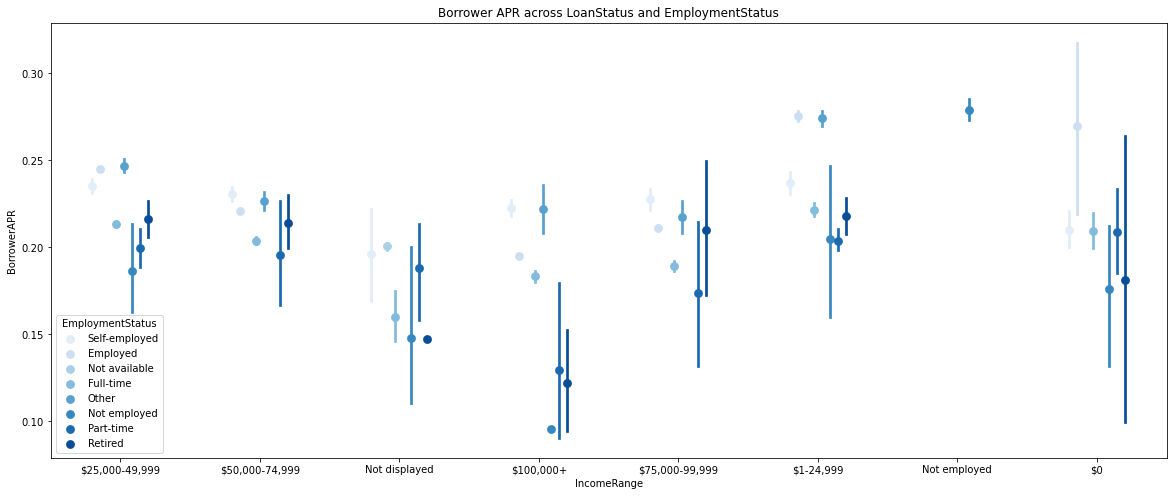

In [46]:
# Explore APR, EmploymentStatus & IncomeRange

fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = loanStatus_df, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR across IncomeRange and EmploymentStatus')
plt.show();

## Multivariate Exploration - Cont'd

In this section, Explore APR across the years
- First we plot APR across the year per IncomeRange .. then split it by LoanStatus

In [77]:
df['year'] = pd.DatetimeIndex(df['ListingCreationDate']).year
loanStatus_df['year'] = pd.DatetimeIndex(loanStatus_df['ListingCreationDate']).year

C:\Users\kathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


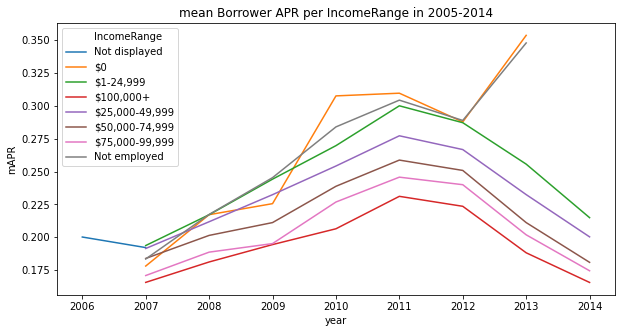

In [102]:
# Overall APR mean per IncomeRange across the years

mAPR_year_IncomeRange = df.groupby(['year','IncomeRange'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

fig = plt.figure(figsize = [10,5])
ax = sb.lineplot(data = mAPR_year_IncomeRange, x = 'year', y = 'mAPR', hue = 'IncomeRange')
plt.title('mean Borrower APR per IncomeRange in 2005-2014')
plt.show();

C:\Users\kathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


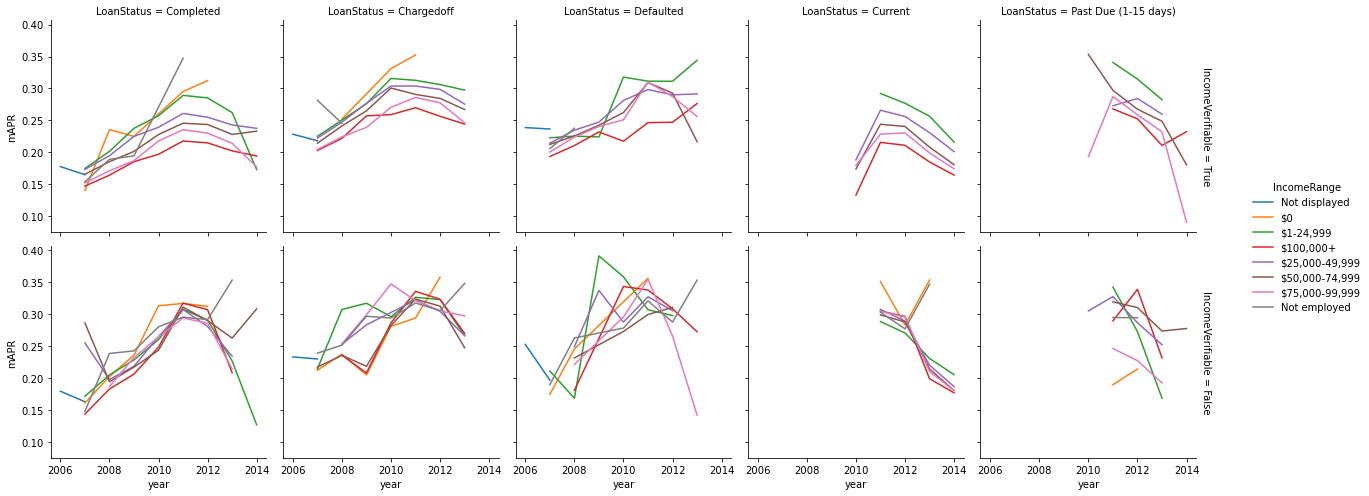

In [87]:
# Overall APR mean per IncomeRange across the years

mAPR_year_IncomeRange_Status = loanStatus_df.groupby(['year','IncomeRange','LoanStatus','IncomeVerifiable'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

g = sb.FacetGrid(data = mAPR_year_IncomeRange_Status, hue='IncomeRange', row = 'IncomeVerifiable', col = 'LoanStatus', size = 3.5, margin_titles = True)
g.map(sb.lineplot, 'year', 'mAPR');
g.add_legend()

plt.show()

## Multivariate Exploration - Cont'd

In this section, Explore APR across the years
- Then we plot APR across the year per ListingCategory .. then split it by LoanStatus

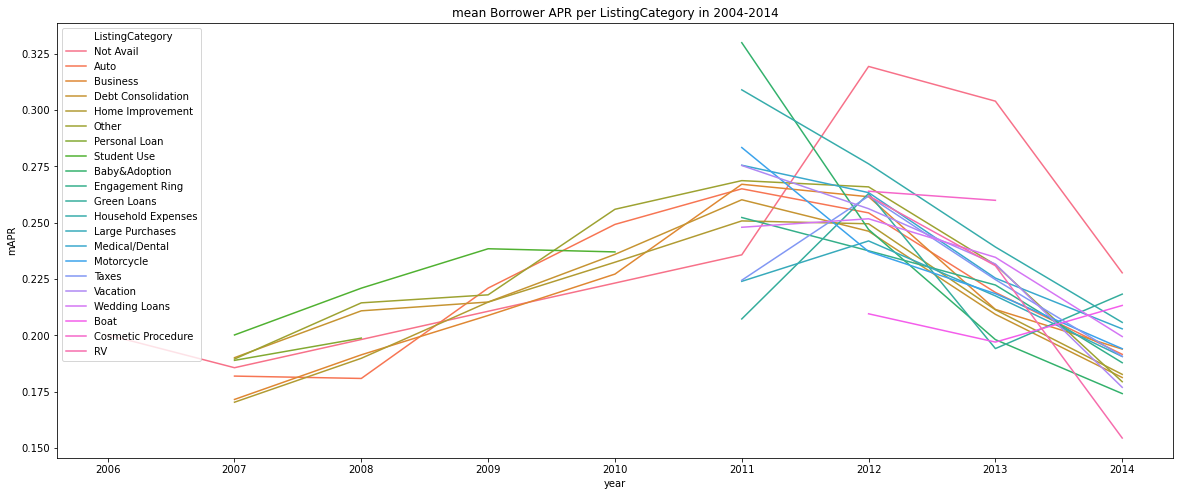

In [70]:
mAPR_year_ListingCategory = df.groupby(['year','ListingCategory'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

fig = plt.figure(figsize = [20,8])
ax = sb.lineplot(data = mAPR_year_ListingCategory, x = 'year', y = 'mAPR', hue = 'ListingCategory')
plt.title('mean Borrower APR per ListingCategory in 2005-2014')
plt.show();

C:\Users\kathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


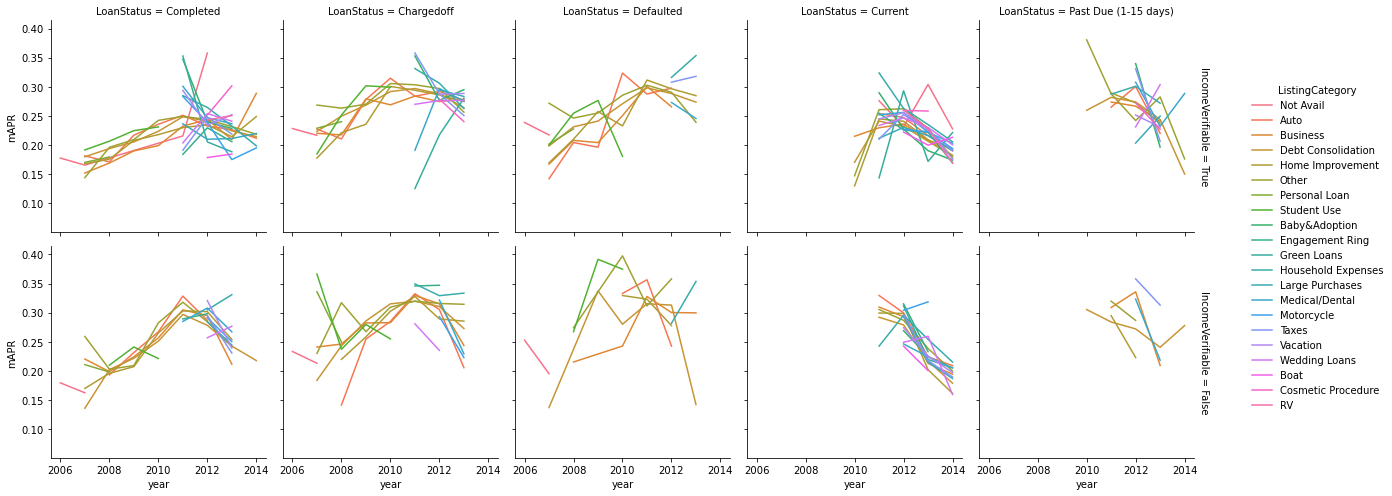

In [86]:
# Overall APR mean per ListingCategory across the years

mAPR_year_IncomeRange_Status = loanStatus_df.groupby(['year','ListingCategory','LoanStatus','IncomeVerifiable'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

g = sb.FacetGrid(data = mAPR_year_IncomeRange_Status, hue='ListingCategory', row = 'IncomeVerifiable', col = 'LoanStatus', size = 3.5, margin_titles = True)
g.map(sb.lineplot, 'year', 'mAPR');
g.add_legend()

plt.show()

## Multivariate Exploration - Cont'd

In this section, Explore APR across the years
- Then we plot APR across the year per EstimatedLoss .. then split it by LoanStatus

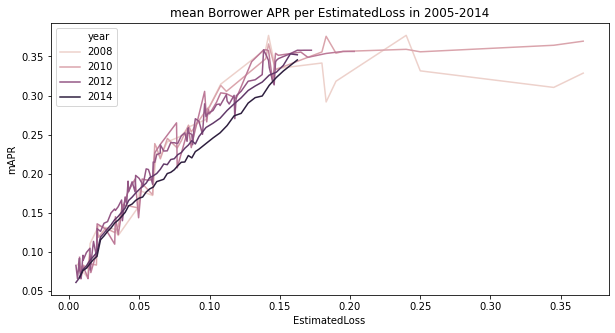

In [101]:
mAPR_year_EstimatedLoss = df.groupby(['year','EstimatedLoss'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

fig = plt.figure(figsize = [10,5])
ax = sb.lineplot(data = mAPR_year_EstimatedLoss, x = 'EstimatedLoss', y = 'mAPR', hue = 'year')
plt.title('mean Borrower APR per EstimatedLoss in 2005-2014')
plt.show();

C:\Users\kathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


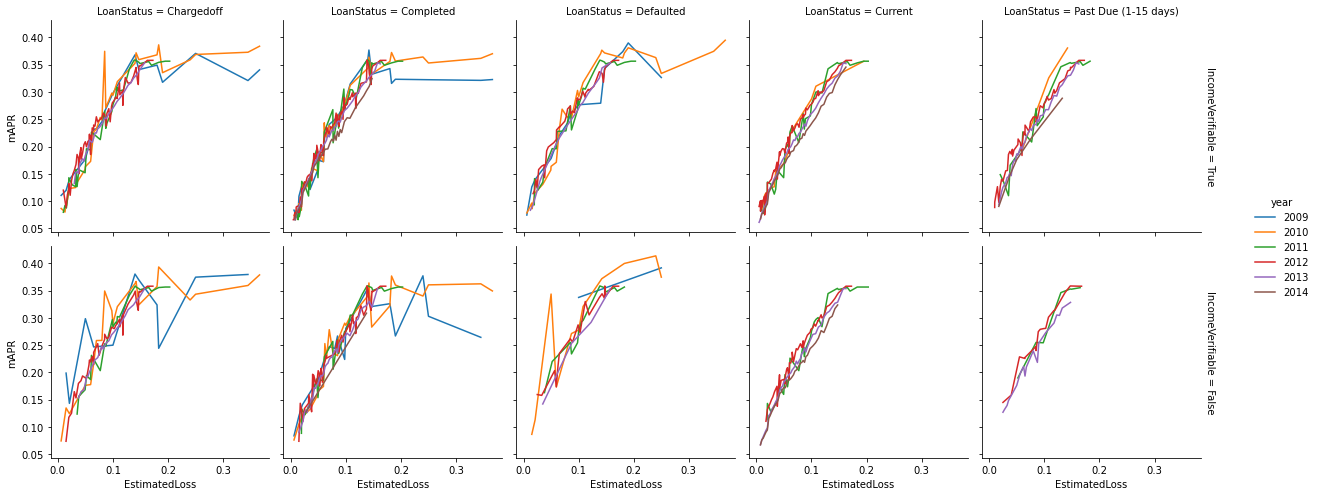

In [88]:
# Overall APR mean per EstimatedLoss across the years

mAPR_year_EstimatedLoss_Status = loanStatus_df.groupby(['year','EstimatedLoss','LoanStatus','IncomeVerifiable'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

g = sb.FacetGrid(data = mAPR_year_EstimatedLoss_Status, hue='year', row = 'IncomeVerifiable', col = 'LoanStatus', size = 3.5, margin_titles = True)
g.map(sb.lineplot, 'EstimatedLoss', 'mAPR');
g.add_legend()

plt.show()

## Multivariate Exploration - Cont'd

In this section, Explore APR across the years
- Then we plot APR across the year per EstimatedReturn .. then split it by LoanStatus

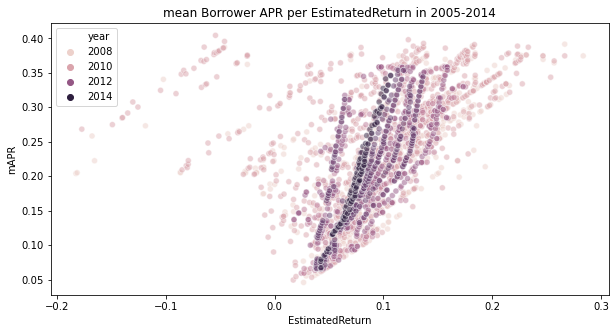

In [100]:
mAPR_year_EstimatedReturn = df.groupby(['year','EstimatedReturn'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

fig = plt.figure(figsize = [10,5])
ax = sb.scatterplot(data = mAPR_year_EstimatedReturn, x = 'EstimatedReturn', y = 'mAPR', hue = 'year', alpha=0.5)
plt.title('mean Borrower APR per EstimatedReturn in 2005-2014')
plt.show();

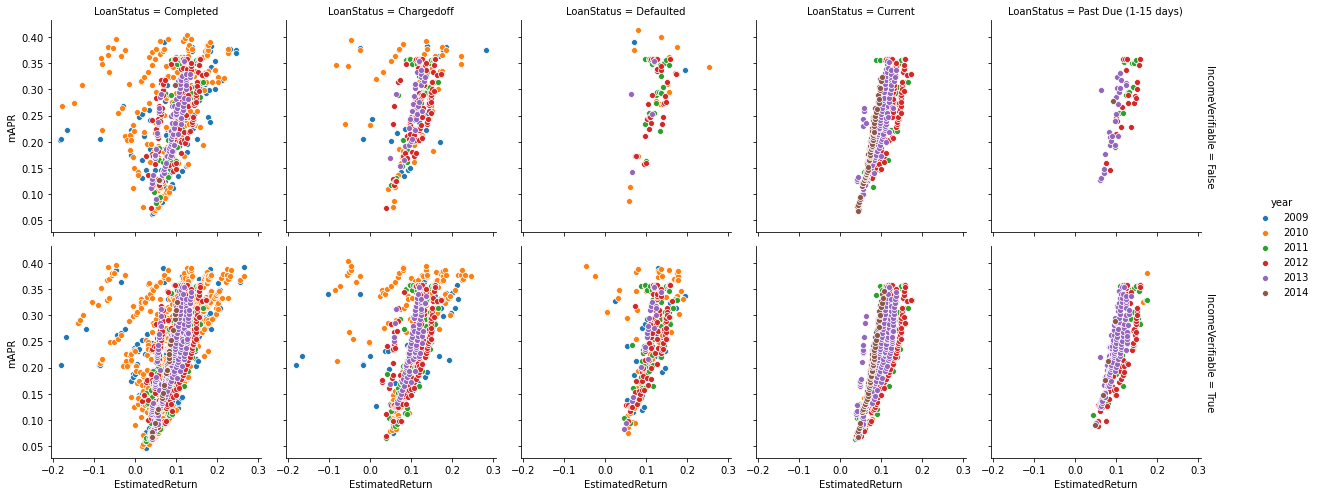

In [97]:
# Overall APR mean per EstimatedReturn across the years

mAPR_year_EstimatedReturn_Status = loanStatus_df.groupby(['year','EstimatedReturn','LoanStatus','IncomeVerifiable'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

g = sb.FacetGrid(data = mAPR_year_EstimatedReturn_Status, hue='year', row = 'IncomeVerifiable', col = 'LoanStatus', size = 3.5, margin_titles = True)
g.map(sb.scatterplot, 'EstimatedReturn', 'mAPR');
g.add_legend()

plt.show()

## Multivariate Exploration - Cont'd

In this section, Explore APR across the years
- Then we plot APR across the year per OpenCreditLines .. then split it by LoanStatus

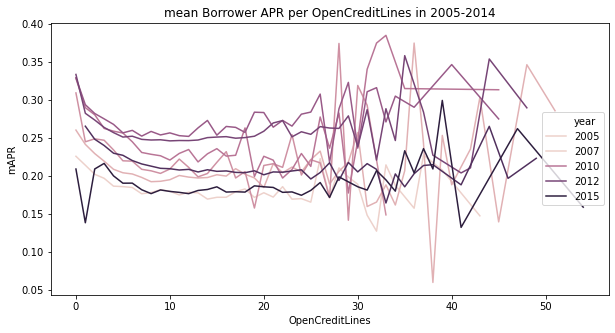

In [99]:
mAPR_year_OpenCredit = df.groupby(['year','OpenCreditLines'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

fig = plt.figure(figsize = [10,5])
ax = sb.lineplot(data = mAPR_year_OpenCredit, x = 'OpenCreditLines', y = 'mAPR', hue = 'year')
plt.title('mean Borrower APR per OpenCreditLines in 2005-2014')
plt.show();

C:\Users\kathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


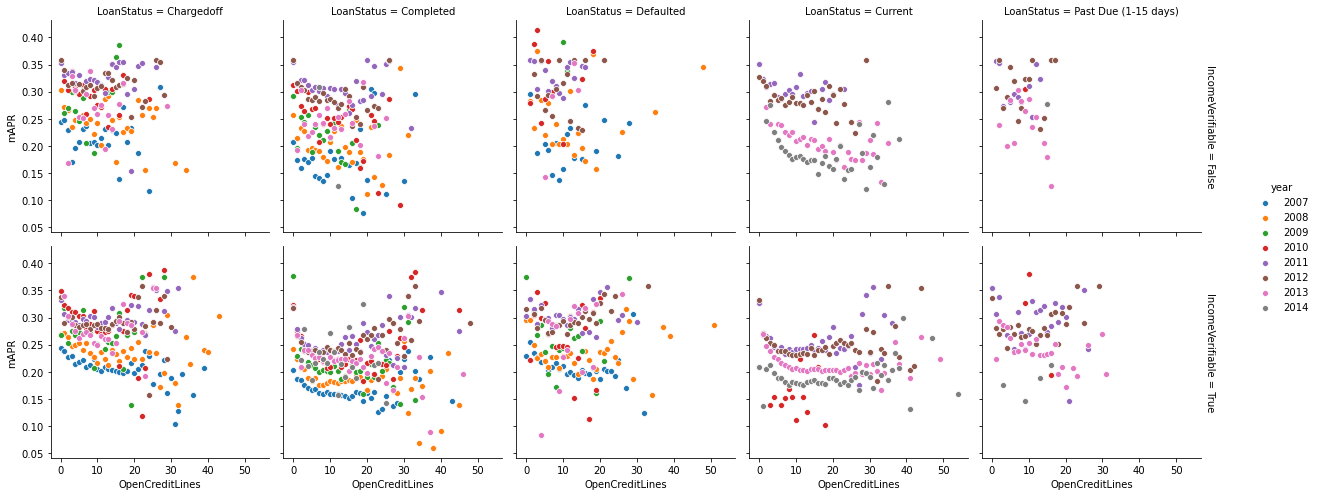

In [96]:
# Overall APR mean per EstimatedLoss across the years

mAPR_year_OpenCredit_Status = loanStatus_df.groupby(['year','OpenCreditLines','LoanStatus','IncomeVerifiable'])['BorrowerAPR'].mean().reset_index(name ='mAPR')

g = sb.FacetGrid(data = mAPR_year_OpenCredit_Status, hue='year', row = 'IncomeVerifiable', col = 'LoanStatus', size = 3.5, margin_titles = True)
g.map(sb.scatterplot, 'OpenCreditLines', 'mAPR');
g.add_legend()

plt.show()

## Multivariate Exploration - Cont'd

In this section, LoanStatus
- Finally we plot LoanStatus per LoanOriginalAmount, OpenCreditLines, IncomeVerifiable, IncomeRange, ListingCategory & EmploymentStatus

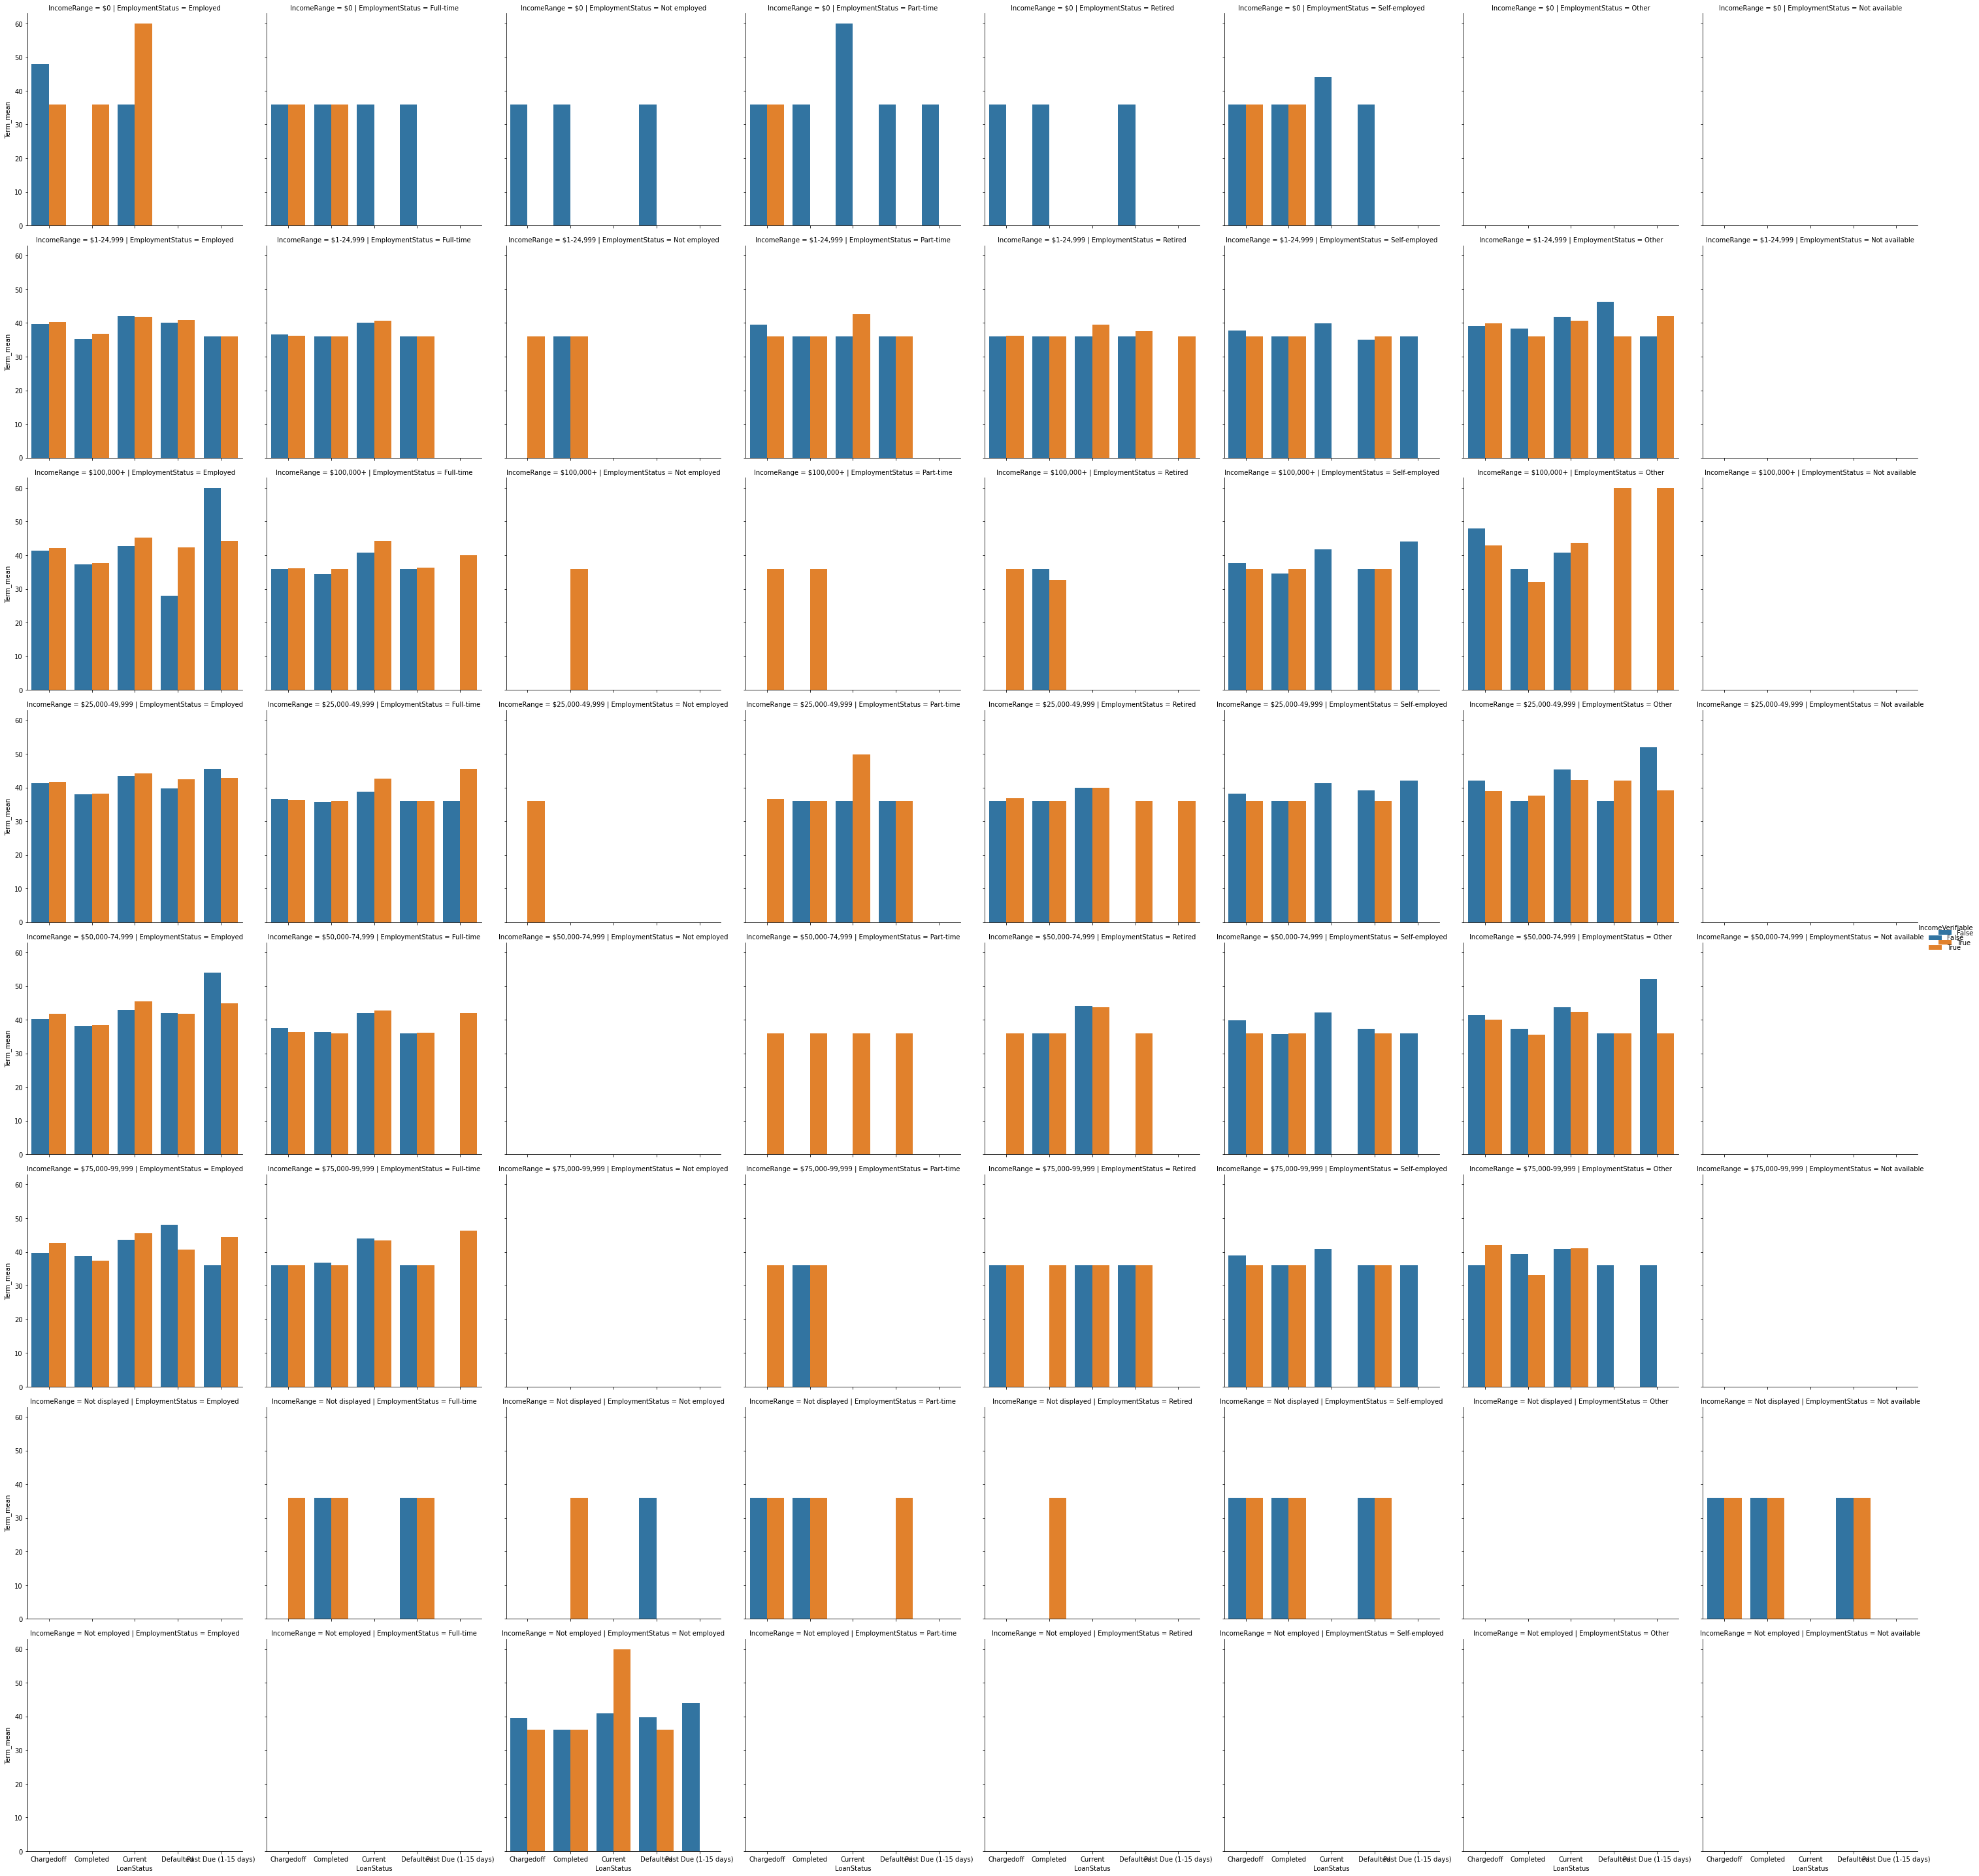

In [144]:
status_analysis1 = loanStatus_df.groupby(['LoanStatus','IncomeVerifiable','IncomeRange','EmploymentStatus'])['Term'].mean().reset_index(name ='Term_mean')

g = sb.catplot(x="LoanStatus", y="Term_mean",
                row="IncomeRange", col = 'EmploymentStatus', hue='IncomeVerifiable',
                data=status_analysis1, kind="bar");

g.add_legend()
plt.show()

<Figure size 1440x576 with 0 Axes>

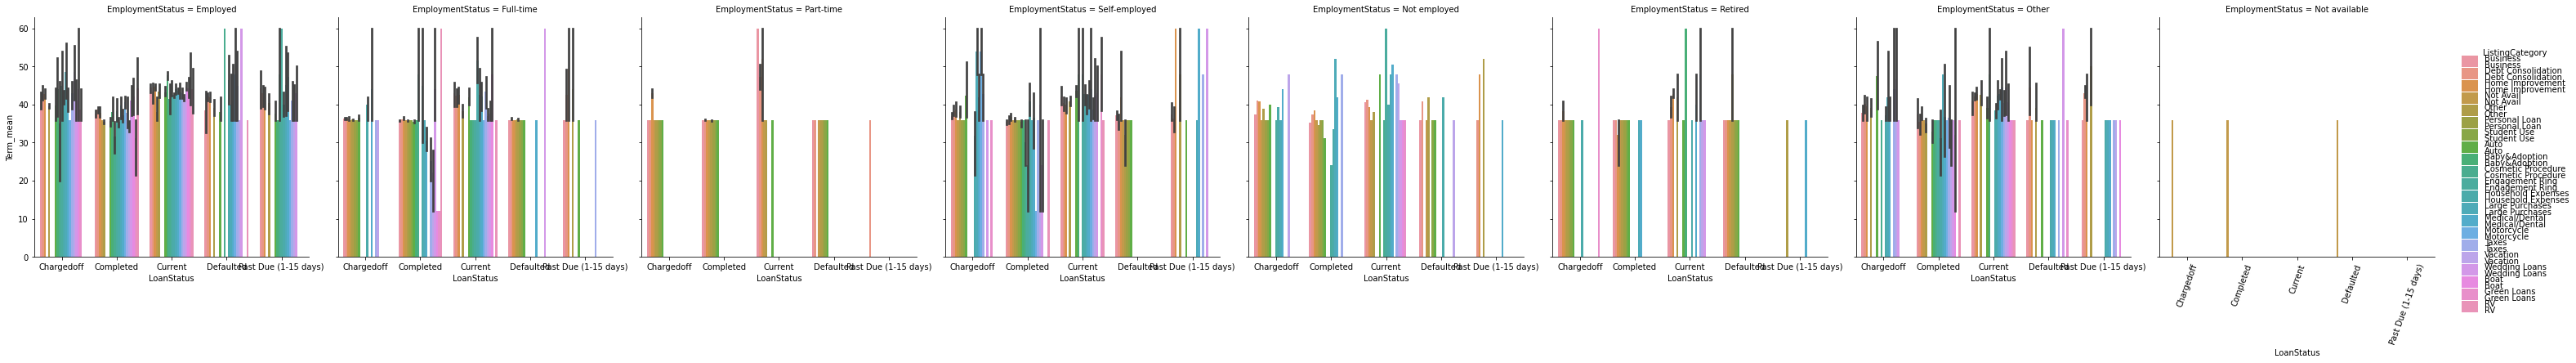

In [147]:

status_analysis2 = loanStatus_df.groupby(['LoanStatus','IncomeRange','ListingCategory','EmploymentStatus'])['Term'].mean().reset_index(name ='Term_mean')
plt.figure(figsize = [20,8])

g = sb.catplot(x="LoanStatus", y="Term_mean",
                hue="ListingCategory", col = 'EmploymentStatus',
                data=status_analysis2, kind="bar");
g.add_legend()
plt.xticks(rotation=70)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Retired ppl who ask for loans have the largest range in APR and Loan Amounts, usually requested for: Student Use, Taxes, Household expenses/Improvement and medical reasons.
- Highest APR mean is for those with IncomeRange of < 25K
- Largest range of defaulted Loan amounts are for Wedding loans, taxes, Medical and large purchases
- On average self-employed ppl request higher loan amounts
- Largest Range of loan amounts with Completed Status are Green Loans


### Were there any interesting or surprising interactions between features?

APR have stronger relationship with EstimatedReturn, espcially if Income is not Verifiable

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!